In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns 

In [170]:
x = pd.read_csv("colleges_data (3) final.csv",index_col = 0)
df = pd.DataFrame(x)
df.head()

,college_name,location,course_fees,review,rank,Average Package,Highest Package,Cutoff rank in CSE
Unnamed: 0,,,,,,,,
0,IIT Madras - Indian Institute of Technology - ...,"Chennai, Tamil Nadu","₹ 2,09,550",8.7 / 10,#3rd/131 in India 2023,2148000.0,19800000.0,144
1,IIT Delhi - Indian Institute of Technology [II...,"New Delhi, Delhi NCR","₹ 2,54,650",8.7 / 10,#1st/35 in India 2023,1760000.0,20000000.0,115
3,IIT Bombay - Indian Institute of Technology - ...,"Mumbai, Maharashtra","₹ 2,29,300",8.8 / 10,#2nd/35 in India 2023,2182000.0,36700000.0,66
4,"RNS Institute of Technology - [RNSIT], Bangalore","Bangalore, Karnataka","₹ 1,16,765",7.7 / 10,#251th/300 in India 2021,550000.0,5600000.0,7554
5,IIT Kharagpur - Indian Institute of Technology...,"Kharagpur, West Bengal","₹ 2,23,600",8.7 / 10,#4th/35 in India 2023,4565874.0,26000000.0,261


In [171]:
df.isna().sum()

college_name             0
location                 0
course_fees              0
review                  44
rank                  1419
Average Package        857
Highest Package        922
Cutoff rank in CSE       0
dtype: int64

In [172]:
df['course_fees'] = df['course_fees'].astype(str)

# Remove rupees symbol ('₹') and commas from the 'course_fees' column
df['course_fees'] = df['course_fees'].str.replace('₹', '').str.replace(',', '')

In [173]:
df.head()

,college_name,location,course_fees,review,rank,Average Package,Highest Package,Cutoff rank in CSE
Unnamed: 0,,,,,,,,
0,IIT Madras - Indian Institute of Technology - ...,"Chennai, Tamil Nadu",209550,8.7 / 10,#3rd/131 in India 2023,2148000.0,19800000.0,144
1,IIT Delhi - Indian Institute of Technology [II...,"New Delhi, Delhi NCR",254650,8.7 / 10,#1st/35 in India 2023,1760000.0,20000000.0,115
3,IIT Bombay - Indian Institute of Technology - ...,"Mumbai, Maharashtra",229300,8.8 / 10,#2nd/35 in India 2023,2182000.0,36700000.0,66
4,"RNS Institute of Technology - [RNSIT], Bangalore","Bangalore, Karnataka",116765,7.7 / 10,#251th/300 in India 2021,550000.0,5600000.0,7554
5,IIT Kharagpur - Indian Institute of Technology...,"Kharagpur, West Bengal",223600,8.7 / 10,#4th/35 in India 2023,4565874.0,26000000.0,261


In [174]:
def extract_review_rating(review_string):
    if isinstance(review_string, str):
        try:
            return float(review_string.split(' / ')[0])
        except ValueError:
            return None  # Handle non-numeric values gracefully (e.g., if the string doesn't contain ' / ')
    else:
        return None  # Handle non-string values gracefully

# Apply the extraction function to the 'review' column
df['review'] = df['review'].apply(extract_review_rating)

In [175]:
df.head()

,college_name,location,course_fees,review,rank,Average Package,Highest Package,Cutoff rank in CSE
Unnamed: 0,,,,,,,,
0,IIT Madras - Indian Institute of Technology - ...,"Chennai, Tamil Nadu",209550,8.7,#3rd/131 in India 2023,2148000.0,19800000.0,144
1,IIT Delhi - Indian Institute of Technology [II...,"New Delhi, Delhi NCR",254650,8.7,#1st/35 in India 2023,1760000.0,20000000.0,115
3,IIT Bombay - Indian Institute of Technology - ...,"Mumbai, Maharashtra",229300,8.8,#2nd/35 in India 2023,2182000.0,36700000.0,66
4,"RNS Institute of Technology - [RNSIT], Bangalore","Bangalore, Karnataka",116765,7.7,#251th/300 in India 2021,550000.0,5600000.0,7554
5,IIT Kharagpur - Indian Institute of Technology...,"Kharagpur, West Bengal",223600,8.7,#4th/35 in India 2023,4565874.0,26000000.0,261


In [176]:
mean_review = df['review'].mean()
df['review'].fillna(mean_review, inplace = True)

In [177]:
df

,college_name,location,course_fees,review,rank,Average Package,Highest Package,Cutoff rank in CSE
Unnamed: 0,,,,,,,,
0,IIT Madras - Indian Institute of Technology - ...,"Chennai, Tamil Nadu",209550,8.700000,#3rd/131 in India 2023,2148000.0,19800000.0,144
1,IIT Delhi - Indian Institute of Technology [II...,"New Delhi, Delhi NCR",254650,8.700000,#1st/35 in India 2023,1760000.0,20000000.0,115
3,IIT Bombay - Indian Institute of Technology - ...,"Mumbai, Maharashtra",229300,8.800000,#2nd/35 in India 2023,2182000.0,36700000.0,66
4,"RNS Institute of Technology - [RNSIT], Bangalore","Bangalore, Karnataka",116765,7.700000,#251th/300 in India 2021,550000.0,5600000.0,7554
5,IIT Kharagpur - Indian Institute of Technology...,"Kharagpur, West Bengal",223600,8.700000,#4th/35 in India 2023,4565874.0,26000000.0,261
...,...,...,...,...,...,...,...,...
2000,"Holy Cross Engineering College - [JEC], Thooth...","Thoothukudi, Tamil Nadu",87000,7.453557,NaN,8000000.0,2450000.0,143626
2001,"Institute of Printing Technology - [IPT], Pune","Pune, Maharashtra",--,7.453557,NaN,280000.0,1900000.0,83309
2002,"MBS College of Engineering and Technology, Jammu","Jammu, Jammu and Kashmir",49000,5.600000,NaN,500000.0,1400000.0,54615


In [178]:
knn_imputer = KNNImputer(n_neighbors = 4)

In [179]:
column_to_impute = 'Average Package'

column_data = df[[column_to_impute]]

# Perform KNN imputation on the specified column
imputed_column = knn_imputer.fit_transform(column_data)

# Replace the original column in the DataFrame with the imputed values
df[column_to_impute] = imputed_column

In [180]:
decimal_places = 6

# Format the numbers with the desired number of decimal places
df[column_to_impute] = df[column_to_impute].apply(lambda x: '{:.{dp}f}'.format(x, dp = decimal_places))

In [181]:
column_impute = 'Highest Package'

columnn_data = df[[column_impute]]

# Perform KNN imputation on the specified column
imputedd_column = knn_imputer.fit_transform(columnn_data)

# Replace the original column in the DataFrame with the imputed values
df[column_impute] = imputedd_column

In [182]:
df.isna().sum()

college_name             0
location                 0
course_fees              0
review                   0
rank                  1419
Average Package          0
Highest Package          0
Cutoff rank in CSE       0
dtype: int64

In [183]:
df

,college_name,location,course_fees,review,rank,Average Package,Highest Package,Cutoff rank in CSE
Unnamed: 0,,,,,,,,
0,IIT Madras - Indian Institute of Technology - ...,"Chennai, Tamil Nadu",209550,8.700000,#3rd/131 in India 2023,2148000.000000,19800000.0,144
1,IIT Delhi - Indian Institute of Technology [II...,"New Delhi, Delhi NCR",254650,8.700000,#1st/35 in India 2023,1760000.000000,20000000.0,115
3,IIT Bombay - Indian Institute of Technology - ...,"Mumbai, Maharashtra",229300,8.800000,#2nd/35 in India 2023,2182000.000000,36700000.0,66
4,"RNS Institute of Technology - [RNSIT], Bangalore","Bangalore, Karnataka",116765,7.700000,#251th/300 in India 2021,550000.000000,5600000.0,7554
5,IIT Kharagpur - Indian Institute of Technology...,"Kharagpur, West Bengal",223600,8.700000,#4th/35 in India 2023,4565874.000000,26000000.0,261
...,...,...,...,...,...,...,...,...
2000,"Holy Cross Engineering College - [JEC], Thooth...","Thoothukudi, Tamil Nadu",87000,7.453557,NaN,8000000.000000,2450000.0,143626
2001,"Institute of Printing Technology - [IPT], Pune","Pune, Maharashtra",--,7.453557,NaN,280000.000000,1900000.0,83309
2002,"MBS College of Engineering and Technology, Jammu","Jammu, Jammu and Kashmir",49000,5.600000,NaN,500000.000000,1400000.0,54615


In [184]:
df = df.drop(columns = ['rank'])
df

,college_name,location,course_fees,review,Average Package,Highest Package,Cutoff rank in CSE
Unnamed: 0,,,,,,,
0,IIT Madras - Indian Institute of Technology - ...,"Chennai, Tamil Nadu",209550,8.700000,2148000.000000,19800000.0,144
1,IIT Delhi - Indian Institute of Technology [II...,"New Delhi, Delhi NCR",254650,8.700000,1760000.000000,20000000.0,115
3,IIT Bombay - Indian Institute of Technology - ...,"Mumbai, Maharashtra",229300,8.800000,2182000.000000,36700000.0,66
4,"RNS Institute of Technology - [RNSIT], Bangalore","Bangalore, Karnataka",116765,7.700000,550000.000000,5600000.0,7554
5,IIT Kharagpur - Indian Institute of Technology...,"Kharagpur, West Bengal",223600,8.700000,4565874.000000,26000000.0,261
...,...,...,...,...,...,...,...
2000,"Holy Cross Engineering College - [JEC], Thooth...","Thoothukudi, Tamil Nadu",87000,7.453557,8000000.000000,2450000.0,143626
2001,"Institute of Printing Technology - [IPT], Pune","Pune, Maharashtra",--,7.453557,280000.000000,1900000.0,83309
2002,"MBS College of Engineering and Technology, Jammu","Jammu, Jammu and Kashmir",49000,5.600000,500000.000000,1400000.0,54615


In [185]:
columns_to_convert = ["course_fees", "Average Package", "Highest Package"]

for column in columns_to_convert:
    # Convert the column to integers, handling non-integer values and missing values
    df[column] = pd.to_numeric(df[column], errors='coerce', downcast='integer')

    # Fill missing values with a specific integer or handle them as needed
    df[column].fillna(0, inplace=True)  # Fill missing values with 0, change 0 to any value you prefer

    # Convert the column to integer data type
    df[column] = df[column].astype(int)


print(df.dtypes)

college_name           object
location               object
course_fees             int32
review                float64
Average Package         int32
Highest Package         int32
Cutoff rank in CSE      int64
dtype: object


In [186]:
location_counts = df['location'].value_counts()
location_counts

Bangalore, Karnataka      75
Hyderabad, Telangana      71
Pune, Maharashtra         59
Chennai, Tamil Nadu       52
Jaipur, Rajasthan         41
                          ..
Saharsa, Bihar             1
Supaul, Bihar              1
Serampore, West Bengal     1
Sullia, Karnataka          1
Guna, Madhya Pradesh       1
Name: location, Length: 461, dtype: int64

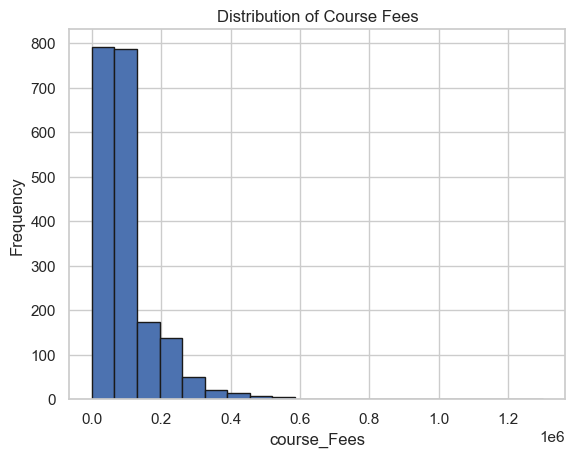

In [187]:
num_bins = 20

plt.hist(df['course_fees'], bins = num_bins, edgecolor = 'k')
plt.xlabel('course_Fees')
plt.ylabel('Frequency')
plt.title('Distribution of Course Fees')
plt.show()

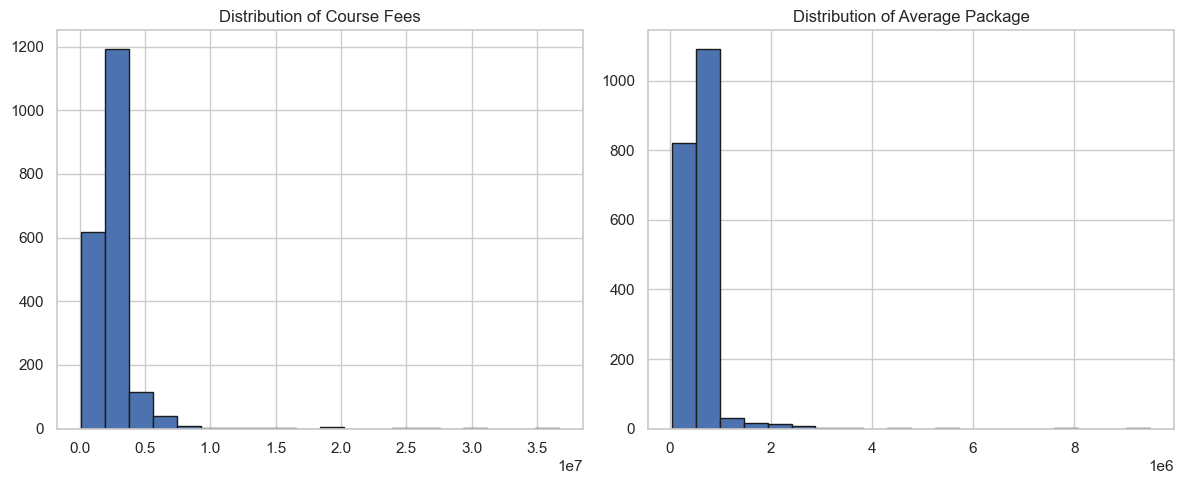

In [188]:
num_bins = 20
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the histogram for 'course fees'
axes[0].hist(df['Highest Package'], bins=num_bins, edgecolor='k')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_title('Distribution of Course Fees')

# Plot the histogram for 'average package'
axes[1].hist(df['Average Package'], bins=num_bins, edgecolor='k')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_title('Distribution of Average Package')

plt.tight_layout()  
plt.show()

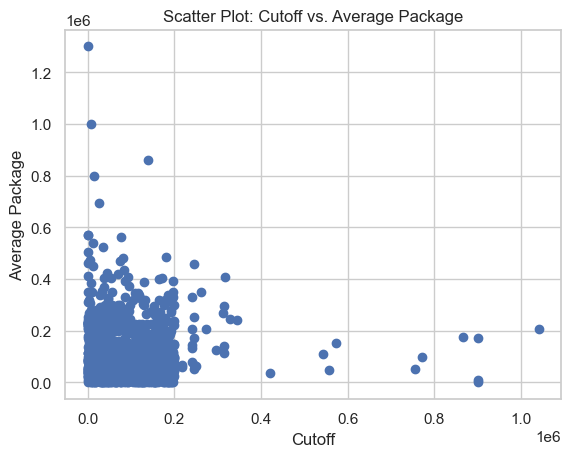

In [189]:
plt.scatter(df['Cutoff rank in CSE'], df['course_fees'])
plt.xlabel('Cutoff')
plt.ylabel('Average Package')
plt.title('Scatter Plot: Cutoff vs. Average Package')
plt.grid(True)  

plt.show()

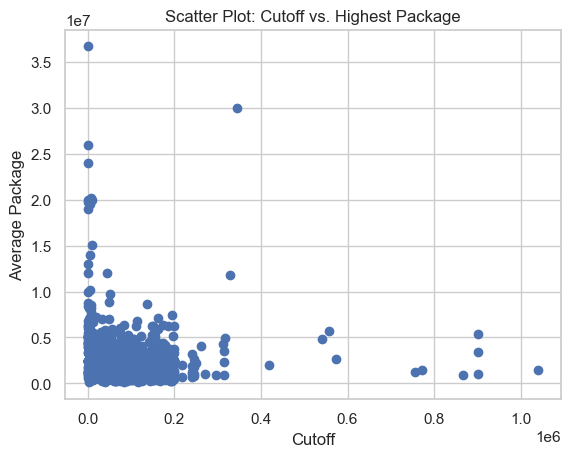

In [190]:
plt.scatter(df['Cutoff rank in CSE'], df['Highest Package'])
plt.xlabel('Cutoff')
plt.ylabel('Average Package')
plt.title('Scatter Plot: Cutoff vs. Highest Package')
plt.grid(True)  

plt.show()

In [191]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix['Cutoff rank in CSE'].sort_values()

Highest Package      -0.108042
Average Package      -0.096546
course_fees          -0.070249
review               -0.022866
Cutoff rank in CSE    1.000000
Name: Cutoff rank in CSE, dtype: float64

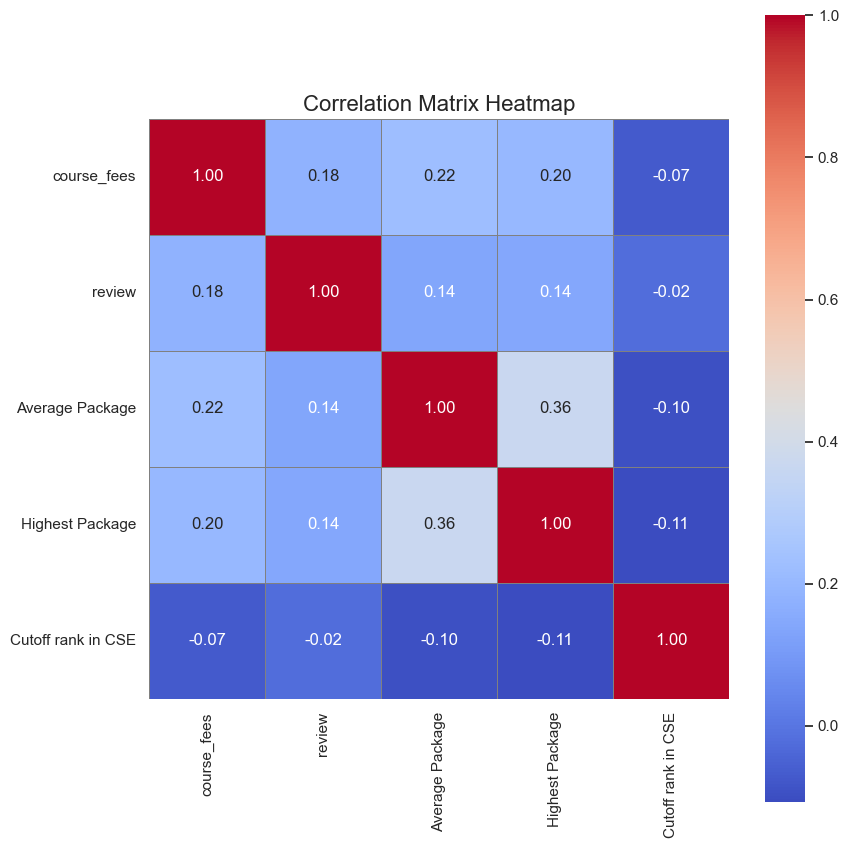

In [192]:
plt.figure(figsize=(9, 9))
sns.set(font_scale=1)
sns.set_style('whitegrid')
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f', linewidths=0.5, linecolor='gray')

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

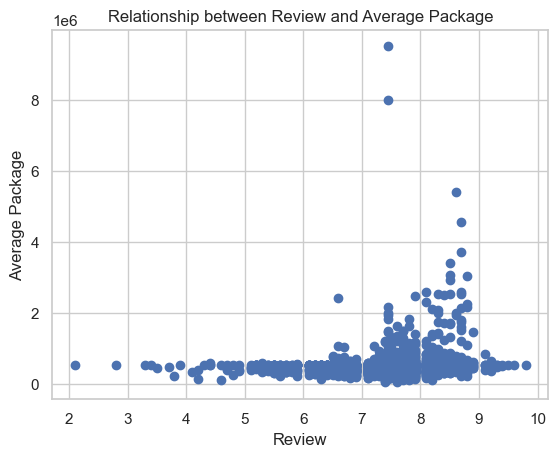

In [193]:
plt.scatter(df['review'], df['Average Package'])
plt.xlabel('Review')
plt.ylabel('Average Package')
plt.title('Relationship between Review and Average Package')
plt.show()

In [194]:
mean_course_fees = df['course_fees'].mean()
print("Mean Course Fees:", mean_course_fees)

Mean Course Fees: 99700.99849094567


In [195]:
# Convert the "course fees" column to integers, handling non-integer values and missing values
df['course_fees'] = pd.to_numeric(df['course_fees'], errors='coerce', downcast='integer')

# Fill missing values with a specific integer or handle them as needed
df['course_fees'].fillna(99700, inplace=True)  # Fill missing values with 0, change 0 to any value you prefer

# Convert the column to integer data type
df['course_fees'] = df['course_fees'].astype(int)

# Check the data types of the columns to verify the conversion
print(df.dtypes)

college_name           object
location               object
course_fees             int32
review                float64
Average Package         int32
Highest Package         int32
Cutoff rank in CSE      int64
dtype: object


In [196]:
df.head()

,college_name,location,course_fees,review,Average Package,Highest Package,Cutoff rank in CSE
Unnamed: 0,,,,,,,
0,IIT Madras - Indian Institute of Technology - ...,"Chennai, Tamil Nadu",209550,8.7,2148000,19800000,144
1,IIT Delhi - Indian Institute of Technology [II...,"New Delhi, Delhi NCR",254650,8.7,1760000,20000000,115
3,IIT Bombay - Indian Institute of Technology - ...,"Mumbai, Maharashtra",229300,8.8,2182000,36700000,66
4,"RNS Institute of Technology - [RNSIT], Bangalore","Bangalore, Karnataka",116765,7.7,550000,5600000,7554
5,IIT Kharagpur - Indian Institute of Technology...,"Kharagpur, West Bengal",223600,8.7,4565874,26000000,261


In [197]:
df.to_csv("Clean college rankings.csv")

In [198]:
college_data = df

def recommend_colleges(course_fee_max, review_score_min, average_package_min, highest_package, cutoff_rank, num_colleges):
    # Filter colleges based on the student's criteria
    filtered_colleges = college_data[
        (college_data["course_fees"] <= course_fee_max) &
        (college_data["review"] >= review_score_min) &
        (college_data["Average Package"] >= average_package_min) &
        (college_data["Highest Package"] >= highest_package) &
        (college_data["Cutoff rank in CSE"] >= cutoff_rank)
    ]

    # Display the recommended colleges, limiting to the specified number
    if not filtered_colleges.empty:
        print(f"Displaying the top {num_colleges} recommended colleges:")
        for index, college in filtered_colleges.head(num_colleges).iterrows():
            print(college["college_name"] + " located in  " + college["location"])
    else:
        print("No colleges match the specified criteria.")

In [199]:
# Input criteria from the student
course_fee_max = float(input("Enter maximum course fee: "))
review_score_min = float(input("Enter minimum review score: "))
average_package_min = float(input("Enter minimum average package: "))
highest_package = float(input("Enter highest package: "))
cutoff_rank = float(input("Enter CSE cutoff rank: "))

# Ask the user for the number of colleges to display
num_colleges_to_display = int(input("Enter the number of colleges you want to see: "))

# Recommend the colleges that match the entered criteria
recommend_colleges(course_fee_max, review_score_min, average_package_min, highest_package, cutoff_rank, num_colleges_to_display)

Displaying the top 5 recommended colleges:
RNS Institute of Technology - [RNSIT], Bangalore located in  Bangalore, Karnataka
Parul University, Vadodara located in  Vadodara, Gujarat
CMR University - [CMRU], Bangalore located in  Bangalore, Karnataka
Mody University, Sikar located in  Sikar, Rajasthan
ISM Dhanbad - Indian Institute of Technology - [IITISM], Dhanbad located in  Dhanbad, Jharkhand
